In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
db = pd.read_csv('full_db_cut.csv')

In [5]:
columns = ['Fwd Seg Size Min', 'Bwd IAT Min', 'Fwd Pkt Len Max',
       'Fwd Header Len', 'Init Fwd Win Byts', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Mean', 'Label']

In [6]:
db = db[columns]

In [7]:
train_len = int(db.shape[0] * 0.4)

In [8]:
db_cut = db[:train_len]

In [9]:
db = db.sample(frac = 1, random_state=2)

In [32]:
db_cut

,Fwd Seg Size Min,Bwd IAT Min,Fwd Pkt Len Max,Fwd Header Len,Init Fwd Win Byts,Flow IAT Max,Flow IAT Min,Fwd IAT Mean,Label,Category_Label
0,0,0.0,0.0,0,-1,56320958.0,56320761.0,5.632086e+07,Benign,1
1,0,0.0,0.0,0,-1,56320814.0,56320652.0,5.632073e+07,Benign,1
2,0,0.0,0.0,0,-1,56319525.0,56319098.0,5.631931e+07,Benign,1
3,32,554.0,744.0,488,65535,673900.0,22.0,4.609976e+05,Benign,1
4,32,90.0,744.0,456,5808,1928102.0,21.0,6.772358e+05,Benign,1
...,...,...,...,...,...,...,...,...,...,...
6493172,8,2247.0,36.0,16,-1,24551.0,589.0,2.620900e+04,Benign,1
6493173,8,0.0,42.0,8,-1,963.0,963.0,0.000000e+00,Benign,1
6493174,8,0.0,84.0,8,-1,489.0,489.0,0.000000e+00,Benign,1
6493175,8,19.0,34.0,16,-1,66802.0,19.0,2.711000e+04,Benign,1


In [10]:
categories = {}
for key, value in enumerate(db_cut['Label'].unique()):
    categories[value] = key + 1
db_cut.loc[:, 'Category_Label'] = db_cut.loc[:, 'Label'].map(categories)

In [13]:
categories.items

<function dict.items>

In [83]:
db_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493177 entries, 13956277 to 5570396
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Fwd Seg Size Min   int64  
 1   Bwd IAT Min        float64
 2   Fwd Pkt Len Max    float64
 3   Fwd Header Len     int64  
 4   Init Fwd Win Byts  int64  
 5   Flow IAT Max       float64
 6   Flow IAT Min       float64
 7   Fwd IAT Mean       float64
 8   Label              object 
 9   Category_Label     int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 544.9+ MB


In [88]:
X = db_cut[['Fwd Seg Size Min', 'Bwd IAT Min', 'Fwd Pkt Len Max',
       'Fwd Header Len', 'Init Fwd Win Byts', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Mean']]
y = db_cut['Category_Label']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

In [90]:
RF = RandomForestClassifier()

In [91]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
%%time
test_1 = RF.predict(X_test)

CPU times: total: 1min 2s
Wall time: 1min 2s


In [93]:
accuracy_score(test_1, y_test)

0.9833307152016937

In [94]:
cm = confusion_matrix(test_1,
                      y_test,
                      normalize='true')

Text(95.99999999999999, 0.5, 'True label')

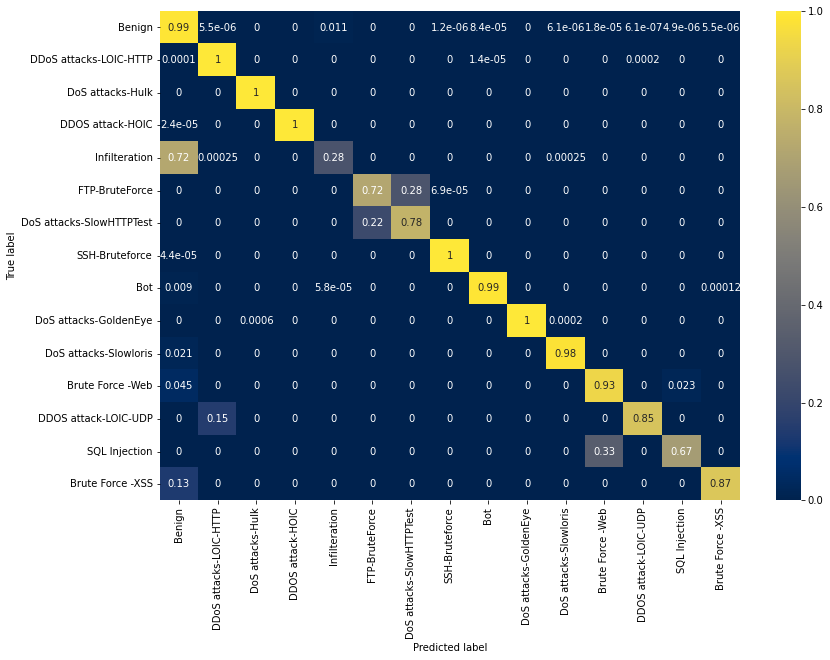

In [97]:
plt.figure(figsize=(13,9))
hm = sns.heatmap(cm,
            annot=True,
            xticklabels=db_cut['Label'].unique(),
            yticklabels=db_cut['Label'].unique(),
            cmap = 'cividis')
hm.set_xlabel('Predicted label')
hm.set_ylabel('True label')